**About the Project:**

---




> This project aims to Forecast Weight Dynamics and Visualize Historical Data. It's a biological Dataset where the target is to predict the nest weight. Here we have to deal with supervised machine learning algorithms as we are provided with a labelled dataset where we have several independent variables as well as one dependent or target variable or feature. The best way to understand any particular problem is by analysing historical data. We have performed several Exploratory Data analyses (EDA) using Power BI which is a widely used Business Intelligence tool. After Performing EDA on Power BI many of the latent characteristics of the dataset have been discovered and now at this moment, we are moving forward with other analyses using Python.


#Importing Necessary Libraries

In [1]:
import pandas as pd        # For working with data in tabular format
import missingno as msno   # For visualizing missing values
import matplotlib.pyplot as plt   # For creating plots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot
import plotly.express as px
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Importing the Dataset

In [2]:
data=pd.read_csv("/kaggle/input/colony-dataset-train/train_data.csv")
len(data.columns)
len(data)

1417

**About the Dataset:**

---

> Initially, it’s necessary to understand the dataset. To work with the dataset, it's crucial to know what features are present and the detail of different features.

> The dataset has 12 different features out of those 11 are independent features and 1 (nest weight) is the target feature.

> There are 1417 entries in the dataset. Below table shows the metadata of the dataset.

<table>
  <thead>
    <tr>
      <th>Feature Name</th>
      <th>Feature Description</th>
      <th>Feature Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Date</td>
      <td>Time when the data was logged</td>
      <td>object</td>
    </tr>
    <tr>
      <td>Colony Activity</td>
      <td>Activity information about the colony</td>
      <td>int64</td>
    </tr>
    <tr>
      <td>Dead Colony Weight</td>
      <td>Weight of the dead colony</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>Nest Temperature</td>
      <td>The temperature of the nest</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>Nest Humidity</td>
      <td>The Humidity of the nest</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>Red Luminous Intensity</td>
      <td>Intensity of the Red Luminous during the data logging time</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>Green Luminous Intensity</td>
      <td>Intensity of the Green Luminous during the data logging time</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>Blue Luminous Intensity</td>
      <td>Intensity of the Blue Luminous during the data logging time</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>White Luminous Intensity</td>
      <td>Intensity of the White Luminous during the data logging time</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>IR Luminous Intensity</td>
      <td>Intensity of the IR(Infra Red) Luminous during the data logging time</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>Sound Intensity</td>
      <td>Intensity of the Sound during the data logging time</td>
      <td>float64</td>
    </tr>
    <tr>
      <td>Nest Weight</td>
      <td>Weight of the Nest during the logging time</td>
      <td>float64</td>
    </tr>
  </tbody>
</table>






**Data Preprocessing**

---



#Checking the Missing Values


> The below plot shows whether is there any missing values present in the dataset in either of the columns. It shows the index or position of the missing entries. As per the plot we can visualize that there is no missing values present in the Dataset.



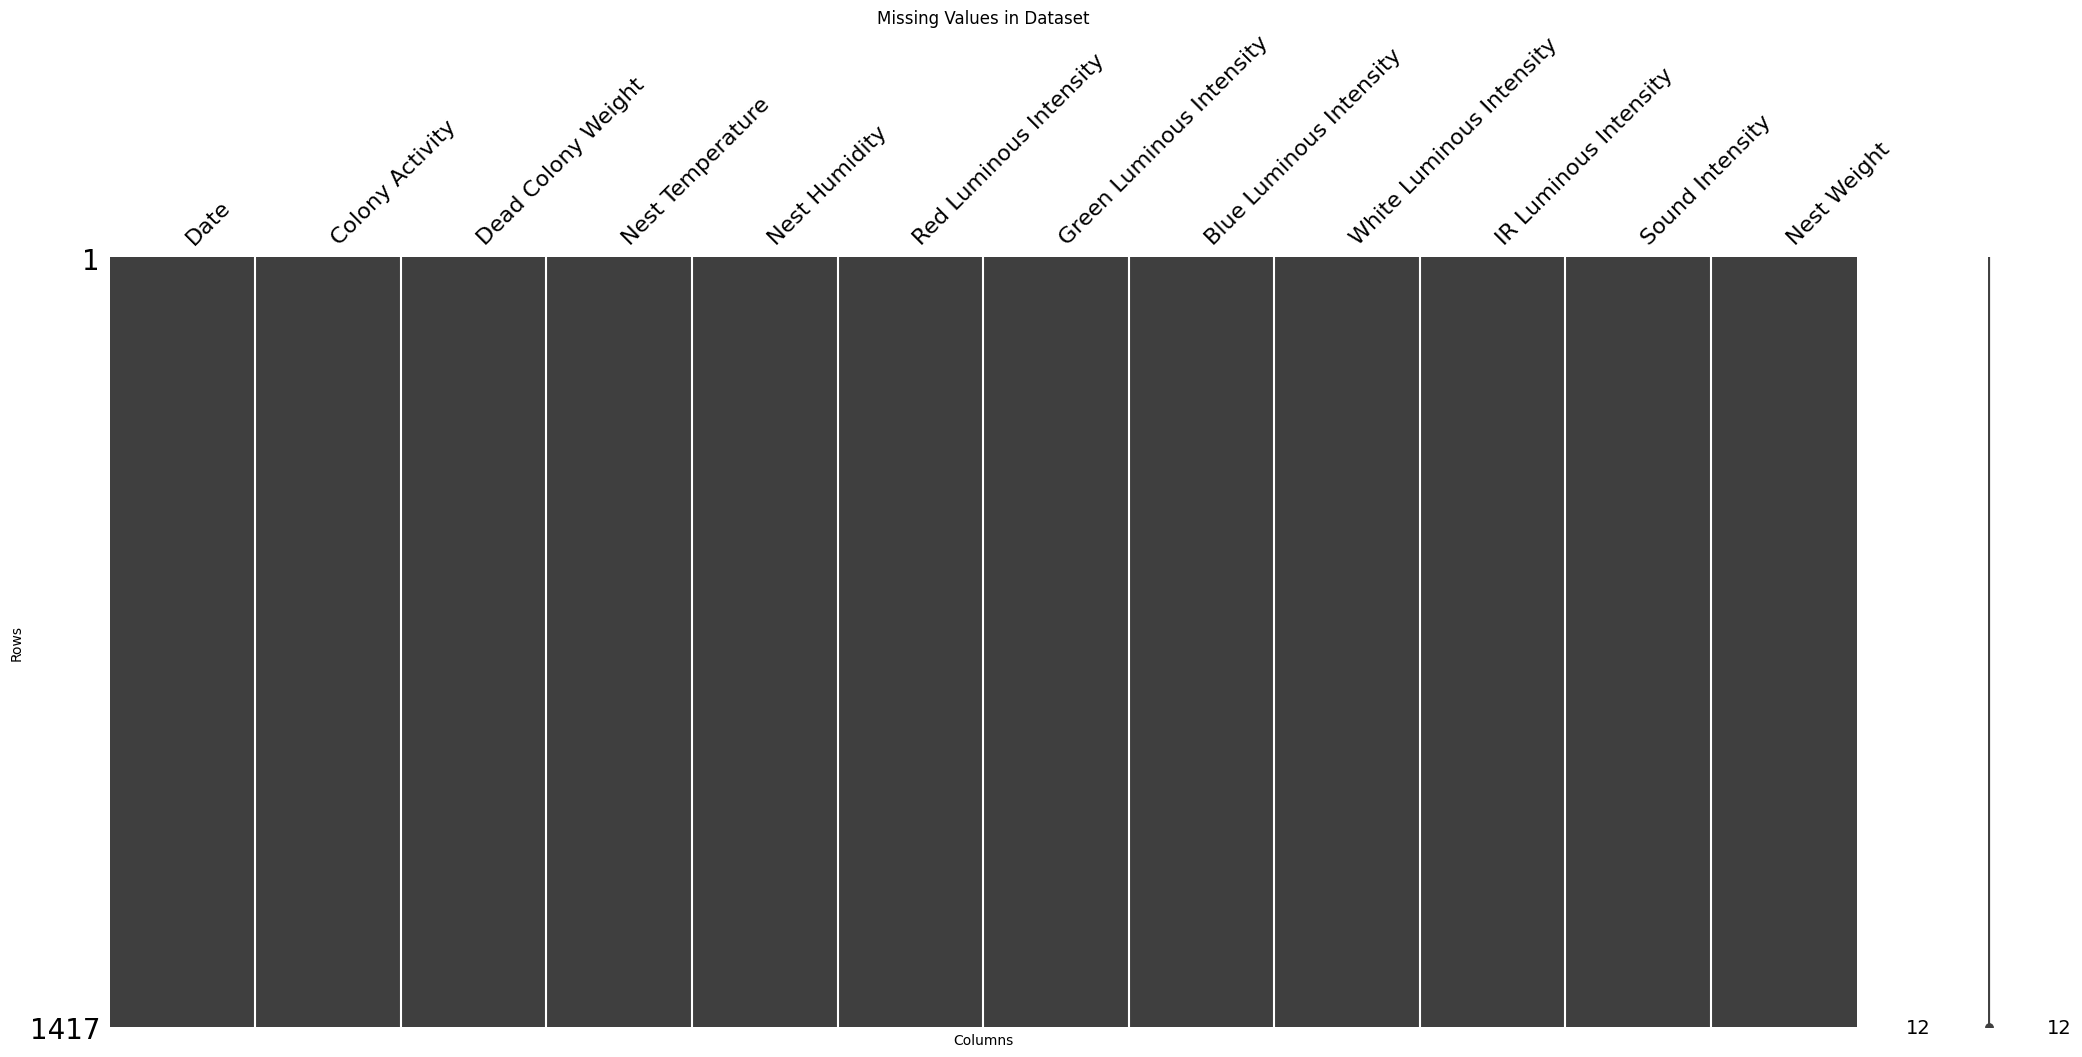

In [3]:
# Plot the missing values for each column
msno.matrix(data)

# Add title and labels to the plot
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

#Checking for Duplicates Values

> It's also necessary to check for any duplicate entries in the dataset. The duplicate entries will cause redundency so it's better to remove duplicates from the dataset.

In [4]:
# Identify duplicate rows
duplicates = data[data.duplicated(keep=False)]

# Print the duplicate rows
if len(duplicates) > 0:
    print('Duplicate Rows:')
    print(duplicates)
else:
    print('No duplicates found.')

print("Total Duplicate Entries: ", len(duplicates))

Duplicate Rows:
                 Date  Colony Activity  Dead Colony Weight  Nest Temperature  \
1045  3/31/2023 22:00                0            0.031581           27.9095   
1046  3/31/2023 22:00                0            0.031581           27.9095   
1047  3/31/2023 23:45                0            0.032621           25.9658   
1048  3/31/2023 23:45                0            0.032621           25.9658   
1049    4/1/2023 0:00                0            0.032621           25.9658   
...               ...              ...                 ...               ...   
1124   4/1/2023 21:19                0            0.013710           23.9012   
1125   4/1/2023 21:34                0            0.018060           25.3917   
1126   4/1/2023 21:34                0            0.018060           25.3917   
1127   4/1/2023 21:49                0            0.018060           25.3917   
1128   4/1/2023 21:49                0            0.018060           25.3917   

      Nest Humidity  Re

#Removing Duplicates:
> So, duplicates are present in the dataset. We can see that there are 84 rows which are repeated. So, we have to remove half of the rows that is 42 rows to remove the duplicates.

> We can also check the new shape of the dataset after removing the duplicates which is (1375, 12). So, 42 rows have been deleted which were repetitive.

In [5]:
# Remove duplicate rows
data_new = data.drop_duplicates()

# Print the shape of the original and cleaned DataFrames
print('Original DataFrame shape:', data.shape)
print('Cleaned DataFrame shape:', data_new.shape)

Original DataFrame shape: (1417, 12)
Cleaned DataFrame shape: (1375, 12)


#Normality Check:
> We can also check the distribution of different features as well as perform normality check to understand whether the features are normally distributed or not.

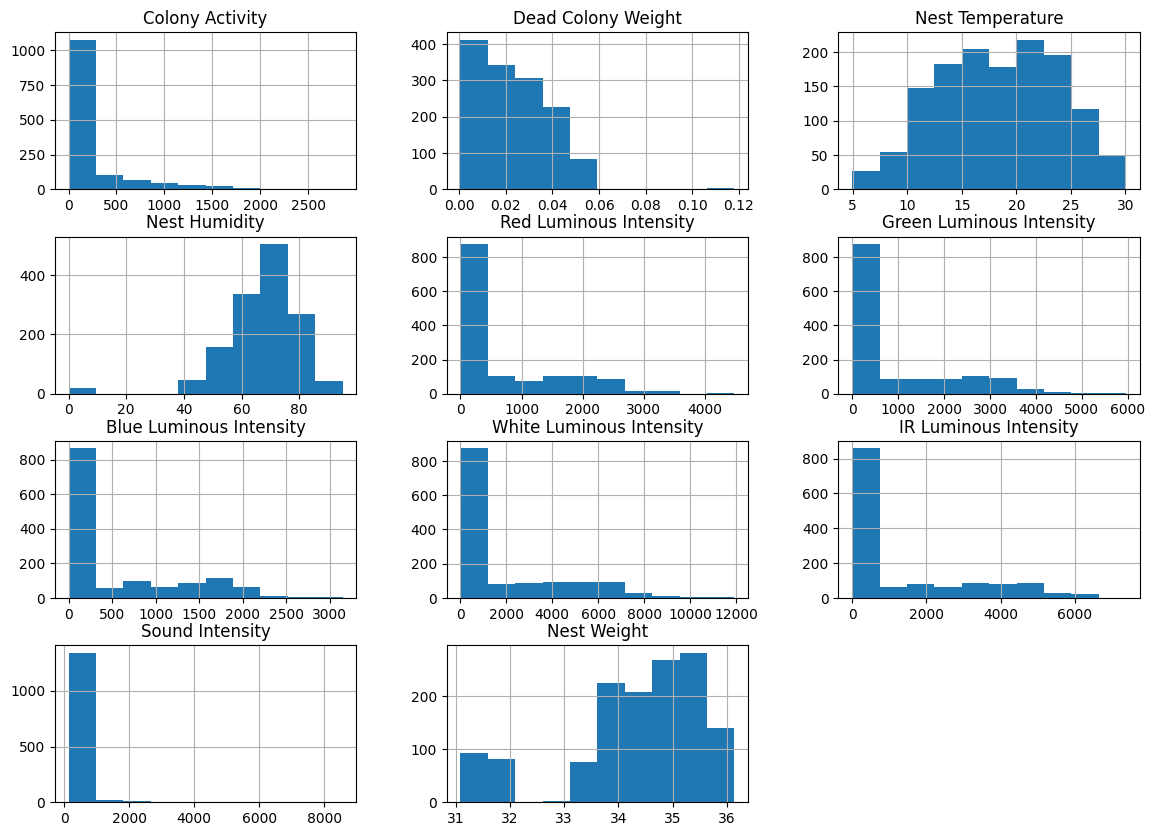

In [6]:
data_new.hist(figsize=(14,10))
plt.show()

It seems like only nest temperature is normally distributed all the other features are not normally distributed, some sort of skewness present in the features. We can also statistically prove the normality by performing Shapiro-Wilk test and check the value of Skewness and  Kurtosis.

Feature: Colony Activity


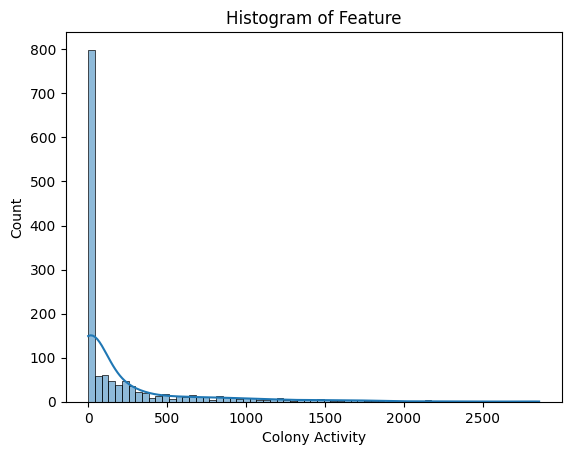

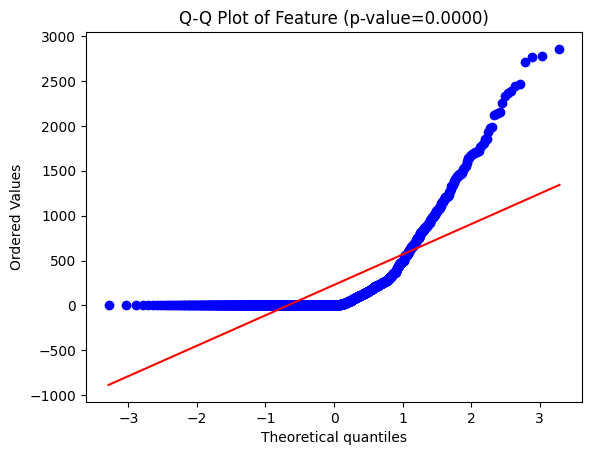

Skewness: 2.701812645622032 Kurtosis: 8.056471193511967
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Dead Colony Weight


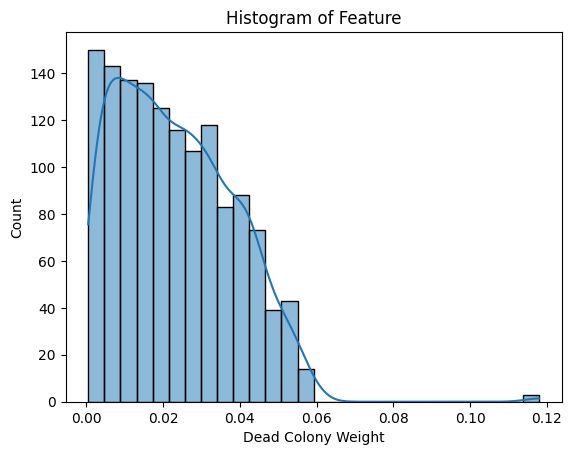

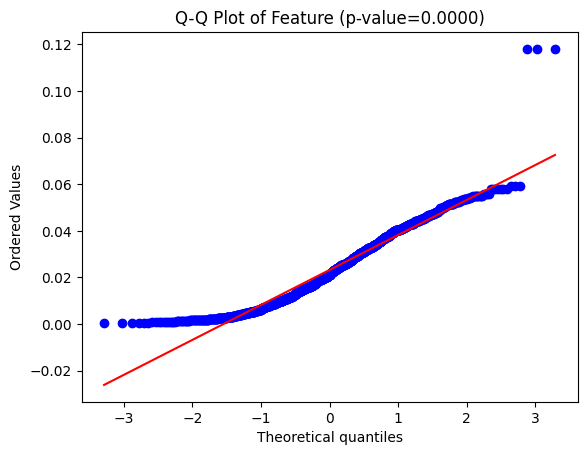

Skewness: 0.791487144012961 Kurtosis: 1.9125317293808983
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Nest Temperature


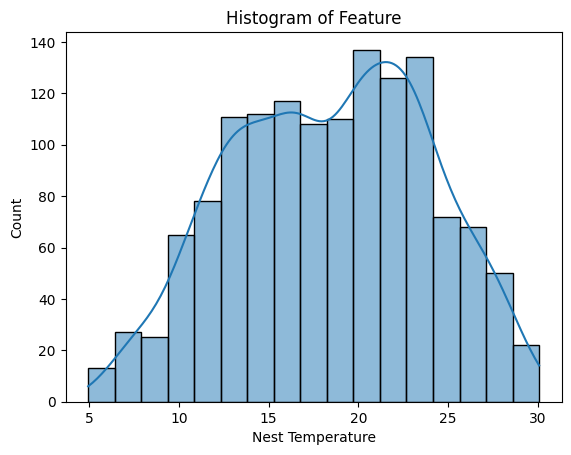

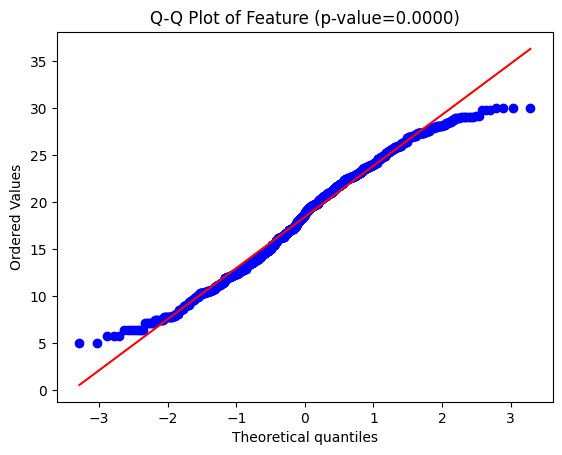

Skewness: -0.10012427943144848 Kurtosis: -0.7942477111245987
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Nest Humidity


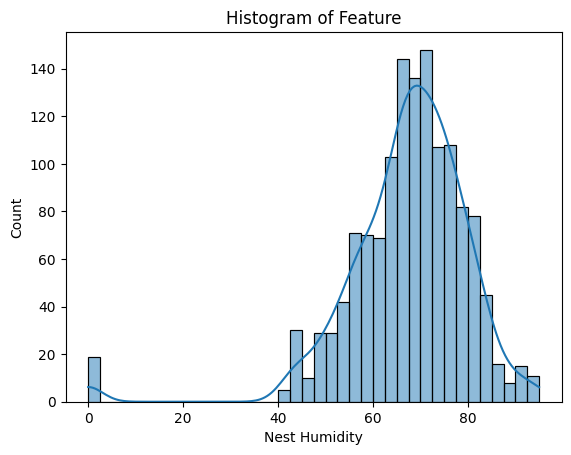

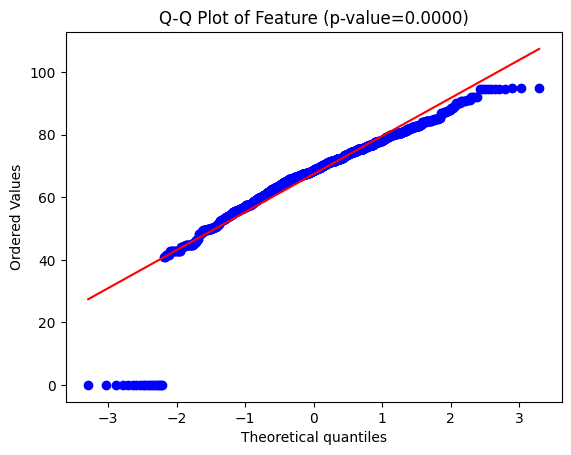

Skewness: -1.8951517573698597 Kurtosis: 8.117299903745156
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Red Luminous Intensity


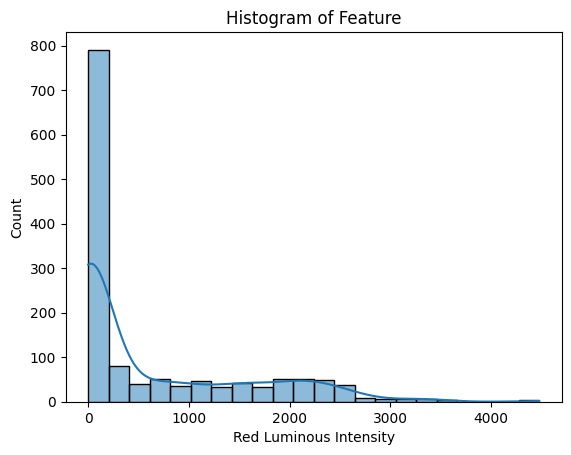

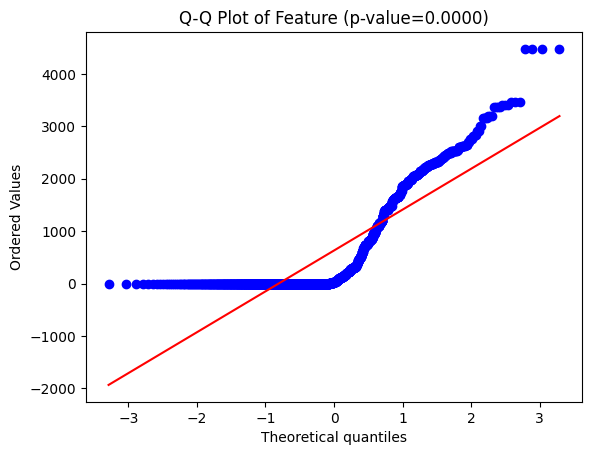

Skewness: 1.3345607399986388 Kurtosis: 0.8217339392139063
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Green Luminous Intensity


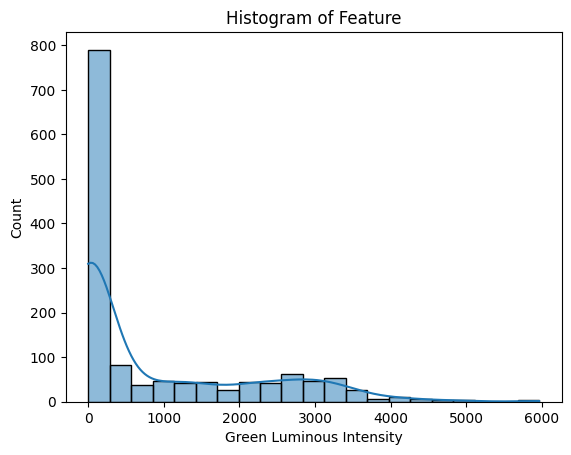

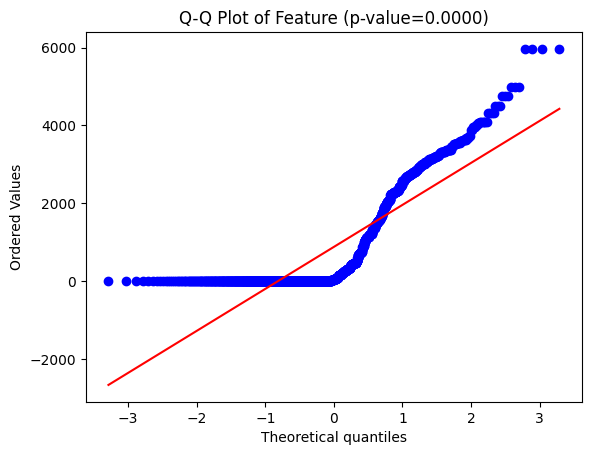

Skewness: 1.2904019053731755 Kurtosis: 0.6273922050972516
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Blue Luminous Intensity


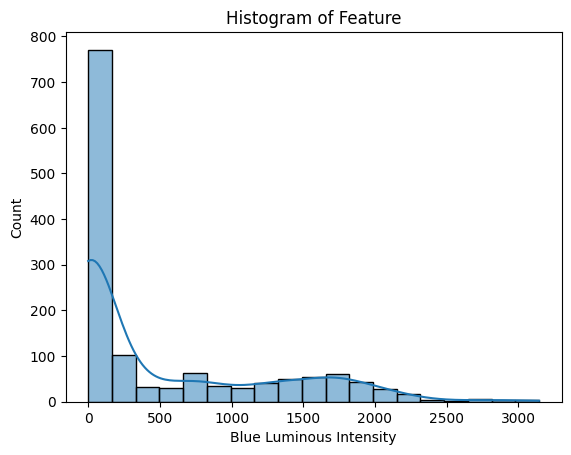

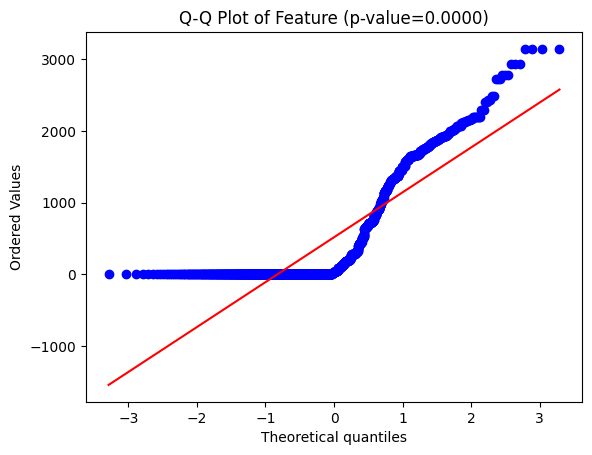

Skewness: 1.2250472508166899 Kurtosis: 0.3196765113034741
Shapiro-Wilk test for normality: p-value=0.0000
Feature: White Luminous Intensity


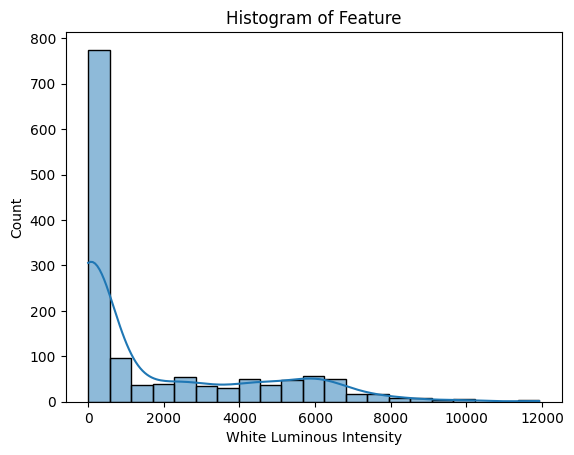

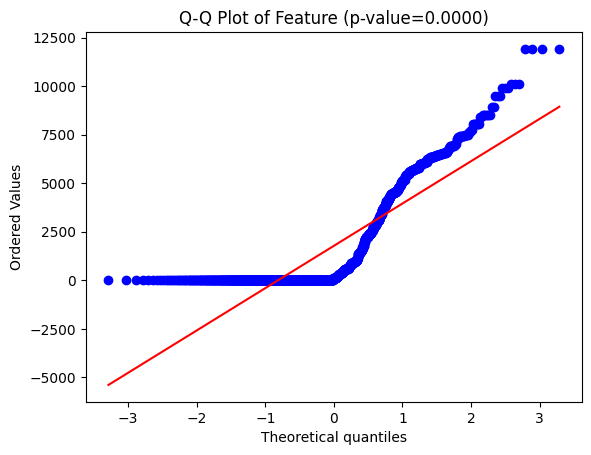

Skewness: 1.3004008773049367 Kurtosis: 0.6678238531088074
Shapiro-Wilk test for normality: p-value=0.0000
Feature: IR Luminous Intensity


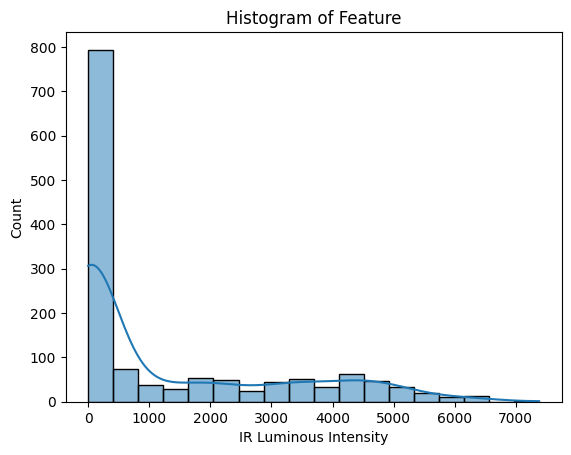

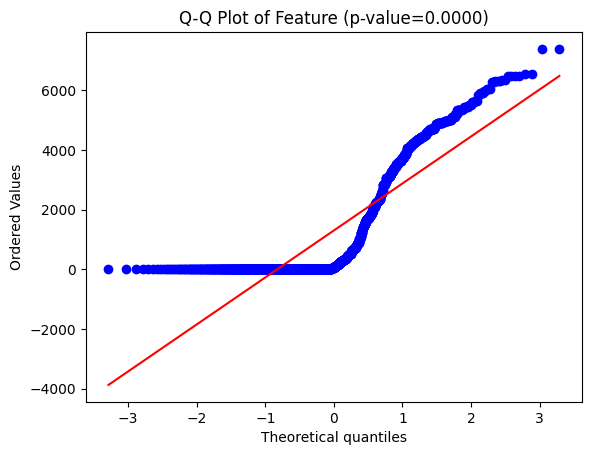

Skewness: 1.1723684547839668 Kurtosis: 0.003283108788246114
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Sound Intensity


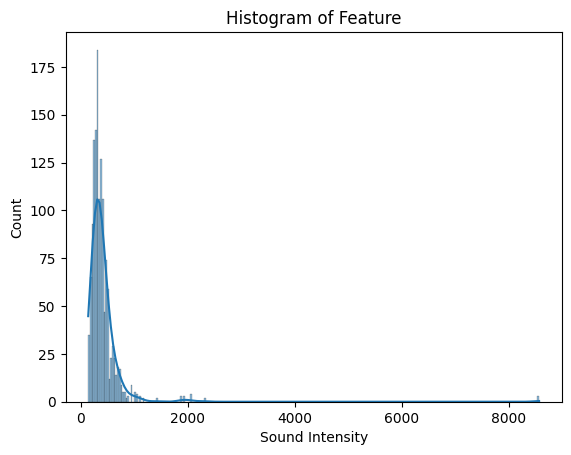

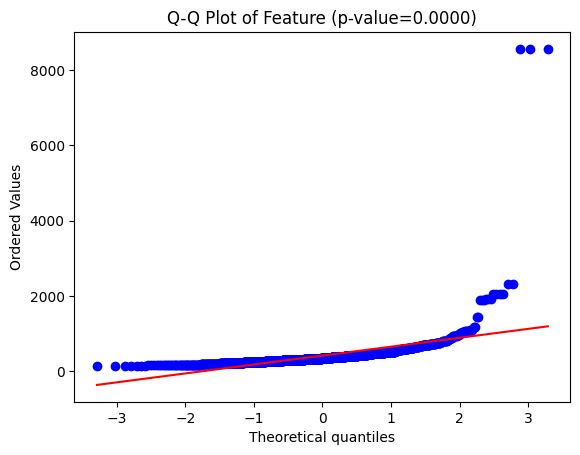

Skewness: 14.090354827127047 Kurtosis: 249.52501474939456
Shapiro-Wilk test for normality: p-value=0.0000
Feature: Nest Weight


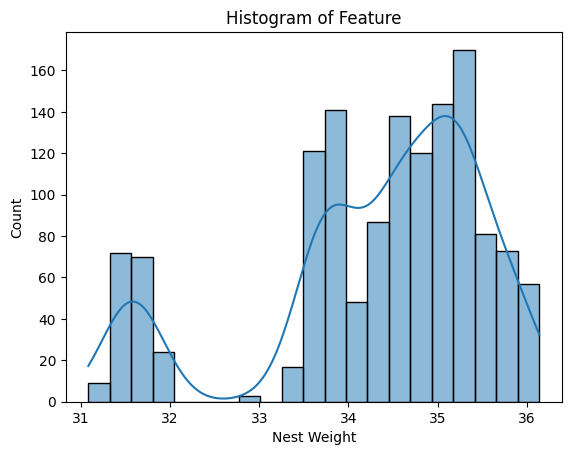

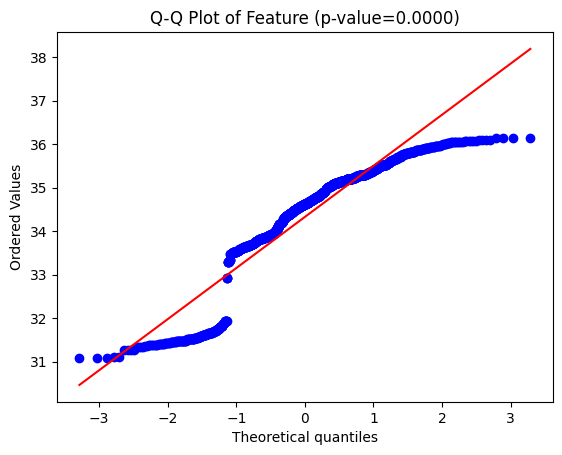

Skewness: -1.0744400828785596 Kurtosis: 0.40603954484906923
Shapiro-Wilk test for normality: p-value=0.0000


In [7]:
# Get the list of numeric feature names
numeric_features = data_new.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loop over each numeric feature and check its normality
for feature_name in numeric_features:
    print(f"Feature: {feature_name}")

    # Create a histogram of the feature
    sns.histplot(data_new[feature_name], kde=True)
    plt.title('Histogram of Feature')
    plt.show()

    # Create a Q-Q plot of the feature
    fig, ax = plt.subplots()
    stats_prob_plot = shapiro(data_new[feature_name])
    probplot(data_new[feature_name], plot=ax)
    ax.set_title(f'Q-Q Plot of Feature (p-value={stats_prob_plot[1]:.4f})')
    plt.show()

    # Check the skewness and kurtosis of the feature
    print(f"Skewness: {data_new[feature_name].skew()} Kurtosis: {data_new[feature_name].kurtosis()}")

    # Perform the Shapiro-Wilk test for normality
    stat, p = shapiro(data_new[feature_name])
    print(f"Shapiro-Wilk test for normality: p-value={p:.4f}")

**Analysis of the Normality Check (Shapiro-Wilk test for normality):**

> We have performed Shapiro-Wilk test for normality check where the Null hypothesis is that one feature is normally distributate and the alternate hypothesis is that the feature is no normally distributed. If the p value is less than 0.05 then we can reject the null hypothesis and can conclude that the feature does not follow normality.

> From the above figure we have see 3 statistical values. Skewness, Kurtosis and p-value of the Shapiro-wilk test for normality.

<table>
  <thead>
    <tr>
      <th>Feature Name</th>
      <th>Skewness</th>
      <th>Kurtosis</th>
      <th>Shapiro-Wilk test (p-value)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Colony Activity</td>
      <td>2.7018</td>
      <td>8.0565</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Colony Activity: Dead Colony Weight</td>
      <td>0.7915</td>
      <td>1.9125</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Nest Temperature</td>
      <td>-0.1001</td>
      <td>-0.7942</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Nest Humidity</td>
      <td>-1.8952</td>
      <td>8.1173</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Red Luminous Intensity</td>
      <td>1.3346</td>
      <td>0.8217</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Green Luminous Intensity</td>
      <td>1.2904</td>
      <td>0.6274</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Blue Luminous Intensity</td>
      <td>1.2250</td>
      <td>0.3197</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>White Luminous Intensity</td>
      <td>1.3004</td>
      <td>0.6678</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>IR Luminous Intensity</td>
      <td>1.1724</td>
      <td>0.0033</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Sound Intensity</td>
      <td>14.0904</td>
      <td>249.5250</td>
      <td>0.0000</td>
    </tr>
    <tr>
      <td>Nest Weight</td>
      <td>-1.0744</td>
      <td>0.4060</td>
      <td>0.0000</td>
    </tr>
  </tbody>
</table>

> **Skewness:** Skewness is a measure of the asymmetry of the distribution. It quantifies the degree to which the distribution is skewed to the left or the right. A positive skewness value indicates that the tail of the distribution is longer on the right side, while a negative skewness value indicates that the tail is longer on the left side. When the skewness value is close to zero, the distribution is approximately symmetric.

> **Kurtosis:** It is a measure of the "peakedness" of the distribution. It quantifies the degree to which the distribution is concentrated around the mean. A high kurtosis value indicates that the distribution has more values in the tails and fewer values in the center, while a low kurtosis value indicates that the distribution has more values in the center and fewer values in the tails. A kurtosis value of 3 is usually considered as the reference value for a normal distribution.

> After checking the statistics it's clear that none of the features are normally distributed.

**How to Handle this not normal features:**
> We have perform different transformation like log transformation to make the features normally distributed, but it may affect the performance of the model. There are some model where there is a strong assumptions about the normally on the contrary there are also several models which can handle features which are not normally distributed. So, we will not perform any transformation and continue with this features only.


#Checking correlation among features
> Checking correlation among features involves examining the extent to which the different independent variables in a dataset are related to each other. Correlation is a statistical measure that quantifies the degree of association between two variables, and it ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

> When building a predictive model, it is important to check for correlation among the independent variables because highly correlated variables can lead to problems such as multicollinearity, which can affect the stability and reliability of the model's coefficients. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to determine the individual effect of each variable on the dependent variable.

In [8]:
# Filter numerical columns
numerical_data = data_new.select_dtypes(include='number')

# Create correlation matrix
corr = numerical_data.corr()

# Create heatmap using Plotly
fig = px.imshow(corr,
                color_continuous_scale='RdBu',
                title='Correlation Matrix Heatmap',
                labels=dict(x='Features', y='Features', color='Correlation'),
                width=850, height=800)

# Show plot
fig.show()

**Outcome of the correlation plot:**

From the above plot, we can illustrate that, Red Luminous Intensity, Green Luminous Intensity, Blue Luminous Intensity, White Luminous Intensity and IR Luminous Intensity are highly correlated with a correlation coefficient of 0.98 (approximately). As stated earlier, if independent variables are correlated with each other then it results in a multicollinearity issue.

Here are a few consequences of multicollinearity:

1. **Unstable coefficients:** In a regression model, the coefficients represent the relationship between the independent variables and the dependent variable. When two or more independent variables are highly correlated, it becomes difficult to distinguish the effect of each variable on the dependent variable. This can lead to unstable coefficients that are sensitive to small changes in the model or the data.

2. **Inflated standard errors:** Multicollinearity can also lead to inflated standard errors, which can make it difficult to determine whether a coefficient is statistically significant or not. Inflated standard errors occur because the model is trying to estimate the effect of two or more variables that are highly correlated, leading to a high degree of uncertainty in the estimates.

3. **Reduced model interpretability:** When two or more variables are highly correlated, it becomes difficult to interpret the results of the model. For example, if we have two highly correlated variables and both have a significant effect on the dependent variable, it may be difficult to determine which variable is driving the effect.

4. **Reduced model accuracy: ** Multicollinearity can also reduce the accuracy of the model's predictions. Highly correlated variables can lead to overfitting, where the model fits the noise in the data instead of the underlying relationship between the variables.

So there are several ways to handle this issue. We can use different dimensionality reduction techniques such as PCA, LDA to handle multicollinearity. Another approach is to remove the redundant features from the model as only one can represent the other.


#Checking Outliers:
> Outliers are data points that significantly deviate from the majority of the observations in a dataset. They are observations that are unusually distant from other data points and may indicate errors, anomalies, or special circumstances within the data. So, it is necessary to check the presence of outliers in different features.

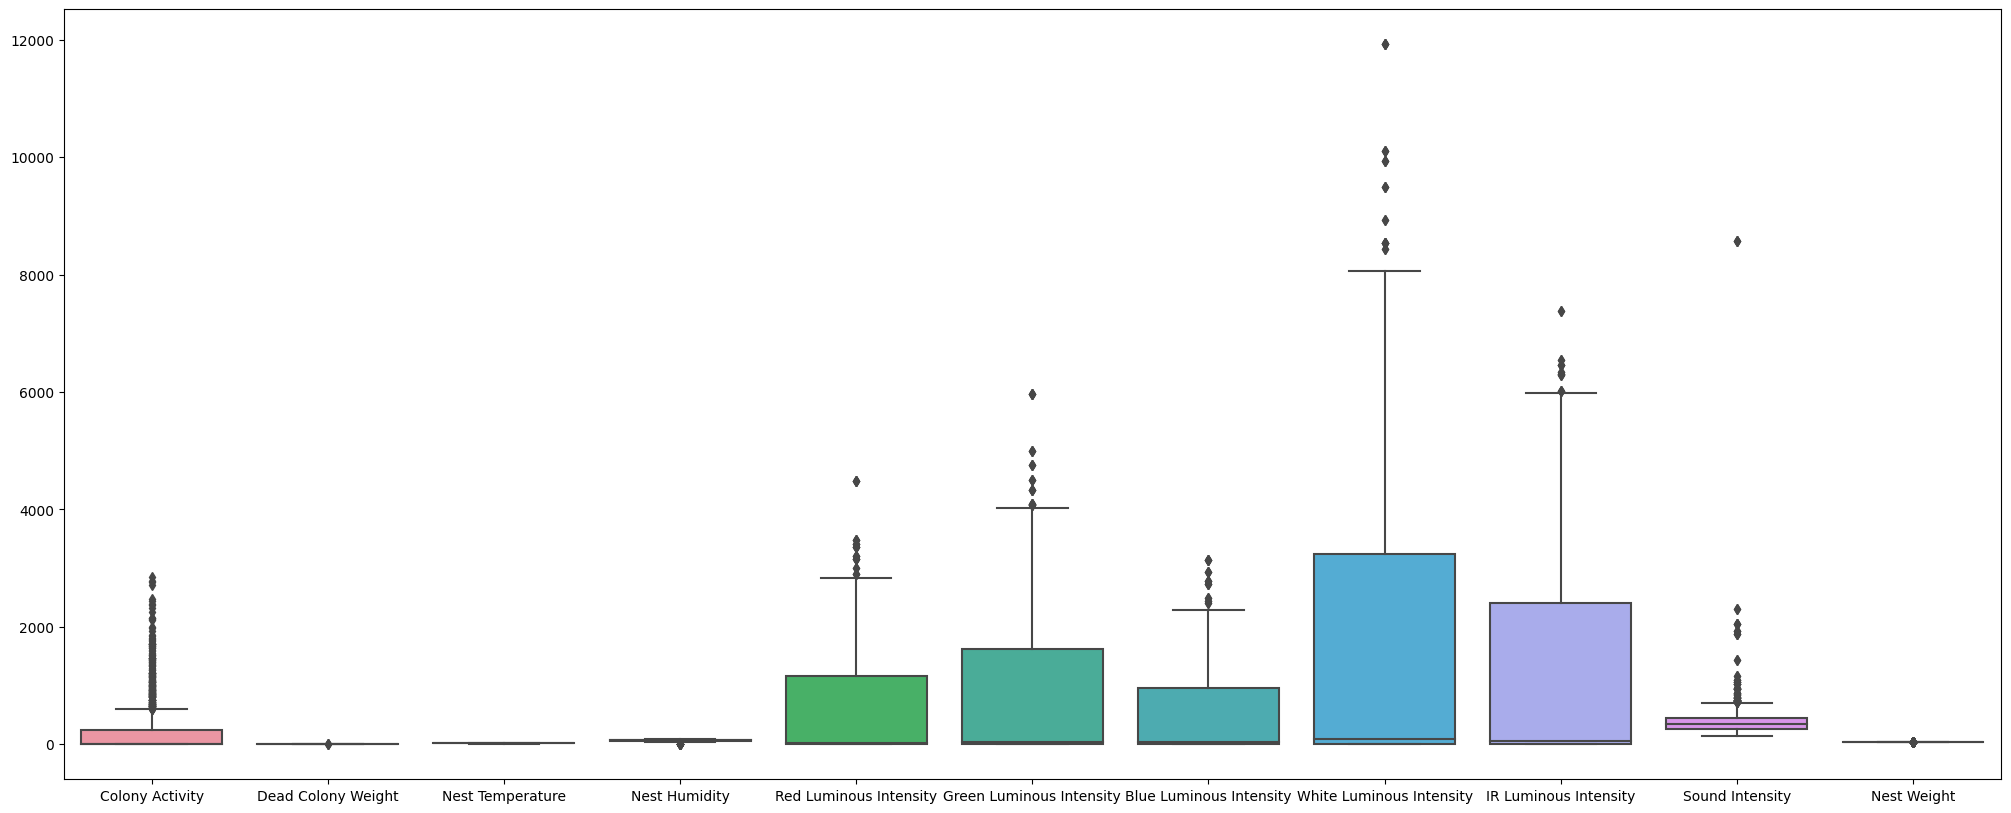

In [9]:
# looking for outliers using box plot

plt.figure(figsize = (25, 10))
sns.boxplot(data = data_new, width = 0.8)
plt.show()

1. From the above box plot we can see that for the features like Dead Colony Weight, Nest Temperature, Nest Humidity, and Nest Weight there is only a horizontal line present which means that the values for these features are relatively tightly clustered together, with little spread. The horizontal line represents the median, indicating the central tendency of the data.

2. For other features we can see the presence of outliers. So, we have to perform standard scaling to handle these outliers instead of eliminating those sharply.


#Splitting the Date Feature to (Month, Year, Day, Hour, Minutes, Seconds)

> We can convert date column to any other format. To understand the significant of date we have decided to split the date to Month, Year, Day, Hour, Minutes, Seconds.

In [10]:
data_date_splitted= data_new.copy() #copying the dataset to data_date_splitted
# Convert the 'Date' column to datetime
data_date_splitted['Date'] = pd.to_datetime(data_date_splitted['Date'], format='%m/%d/%Y %H:%M')
# Extract year, month, day, hour, minute, and second
data_date_splitted['Year'] = data_date_splitted['Date'].dt.year
data_date_splitted['Month'] = data_date_splitted['Date'].dt.month
data_date_splitted['Day'] = data_date_splitted['Date'].dt.day
data_date_splitted['Hour'] = data_date_splitted['Date'].dt.hour
data_date_splitted['Minute'] = data_date_splitted['Date'].dt.minute
data_date_splitted['Second'] = data_date_splitted['Date'].dt.second

data_date_splitted.head()

,Date,Colony Activity,Dead Colony Weight,Nest Temperature,Nest Humidity,Red Luminous Intensity,Green Luminous Intensity,Blue Luminous Intensity,White Luminous Intensity,IR Luminous Intensity,Sound Intensity,Nest Weight,Year,Month,Day,Hour,Minute,Second
0,2023-03-03 15:36:00,3,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,2023,3,3,15,36,0
1,2023-03-03 15:51:00,14,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,2023,3,3,15,51,0
2,2023-03-03 16:07:00,10,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,2023,3,3,16,7,0
3,2023-03-03 18:07:00,0,0.001324,17.0530,67.6702,0,0,0,0,0,265,35.2686,2023,3,3,18,7,0
4,2023-03-03 18:22:00,0,0.001135,17.0530,67.6702,0,0,0,0,0,265,35.2686,2023,3,3,18,22,0


# Feature Importance:

> Before developing any model it's necessary to find out the important feature. In general, if we include more features which are not that statistically significant might increase the model accuracy but at the same time it increases the model complexity and dimensionality which can result in overfitting. There are different algorithms to check the feature importance and we will start will lasso regression (L2 Regularization).

#Feature Importance analysis using Lasso Regression:
We have to consider the bias-variance trade-off while considering an ML model. We aim to develop a model having low bias and low variance. If our model has high bias and high variance it means it does not perform well in both training and test conditions. Sometimes we develop a more complex model which performs well in the train set but performs badly in the test set which leads to overfitting issues. Lasso Regression perform better for feature selection and coefficient penalization.
We can consider the formula for SSE (sum of square error ) of Lasso Regression as follows:

$$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

Here Lambda is the penalization parameter and Beta is the coefficient nothing but weight.

In [11]:
#Splitting the data into train and test set and performing Standard Scaling (Standarization)
# Split data into train and test sets
X_lasso = data_date_splitted.drop(['Nest Weight','Date'], axis=1)
y_lasso = data_date_splitted['Nest Weight']
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

# Scaling the data to ensure that each feature has equal importance when fitting the model
scaler = StandardScaler()
X_train_lasso = scaler.fit_transform(X_train_lasso)
X_test_lasso = scaler.transform(X_test_lasso)

In [12]:
from sklearn.linear_model import LassoCV
# Fit Lasso model with cross-validation to find optimal lambda value
lasso_model = LassoCV(cv=10, random_state=42).fit(X_train_lasso, y_train_lasso)

# Get optimal lambda value
best_lambda = lasso_model.alpha_
print('Best lambda:', best_lambda)

Best lambda: 0.017726957105935425


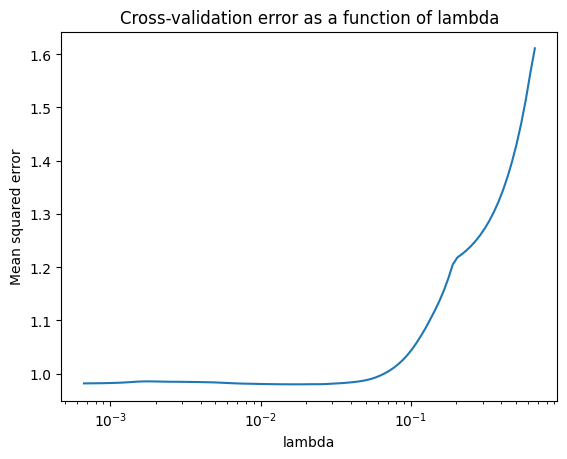

In [13]:
# Plot mean cross-validation error as a function of lambda
mse_path = lasso_model.mse_path_
alphas = lasso_model.alphas_
plt.plot(alphas, mse_path.mean(axis=1))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('Mean squared error')
plt.title('Cross-validation error as a function of lambda')
plt.show()

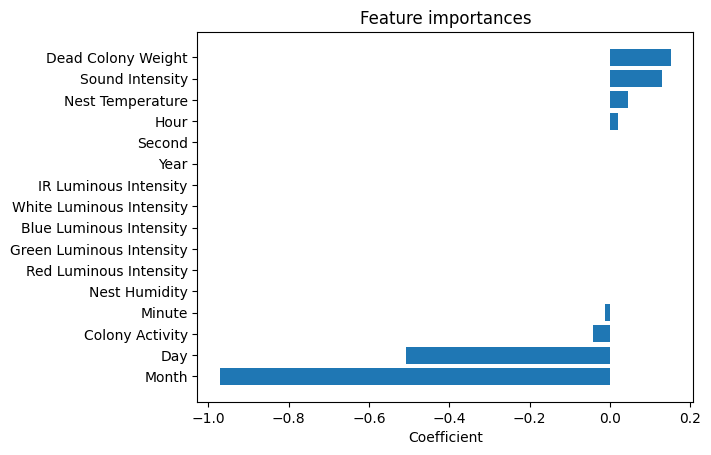

In [14]:
# Get feature importances
coef = pd.Series(lasso_model.coef_, index=X_lasso.columns)
imp_coef = coef.sort_values()
plt.barh(imp_coef.index, imp_coef.values)
plt.title('Feature importances')
plt.xlabel('Coefficient')
plt.show()

In [15]:
# Get coefficient values of each feature
coef_values = lasso_model.coef_
# Print coefficient values of each feature
for i, feature in enumerate(X_lasso.columns):
    print(f'{feature}: {coef_values[i]}')

Colony Activity: -0.04191172175807226
Dead Colony Weight: 0.15205440937967324
Nest Temperature: 0.04621631122334605
Nest Humidity: -0.0
Red Luminous Intensity: -0.0
Green Luminous Intensity: -0.0
Blue Luminous Intensity: -0.0
White Luminous Intensity: -0.0
IR Luminous Intensity: -0.0
Sound Intensity: 0.12997877422569853
Year: 0.0
Month: -0.9708745564950126
Day: -0.5075359605548212
Hour: 0.020752692989082937
Minute: -0.012266868128478504
Second: 0.0


> Lambda is the Regularization parameter. It improvise the penalty terms. Lower values of lamba introduce lower level of penalty whereas higher value introduces higher level of penalty. The model has choosed the optimal lambda value as 0.019008035050677535.

> From the feature importance plot and the coefficient of features we can visualize that, few features are nullified which might not be important for the model development.


#Feature Importance analysis using Random Forest:
> Random forest can be used for feature selection. It is a resemble model where multiple decision tress are used and using voting the final outcome is chosen. Each tree consist of several leaves and nodes. The internal node, nothing but selected features are used to divide the dataset into two separate sets having similar types of characteristics.

> In a Random Forest regression model, multiple decision trees are trained on different subsets of the input data. Each decision tree makes a prediction by traversing the tree from the root to a leaf node, based on the values of the input features. The final prediction of the Random Forest model is the average (or median) of the predictions of the individual trees.

> The key advantage of Random Forest over a single decision tree is that it can handle complex relationships between the input features and the target variable, and can avoid overfitting by using multiple trees that are trained on different subsets of the input data.

> Once the decision trees are trained, the feature importances can be computed by measuring the reduction in variance (or mean squared error) of the target variable when a particular feature is used for splitting the data. Features that lead to a large reduction in variance are considered to be more important for making predictions.

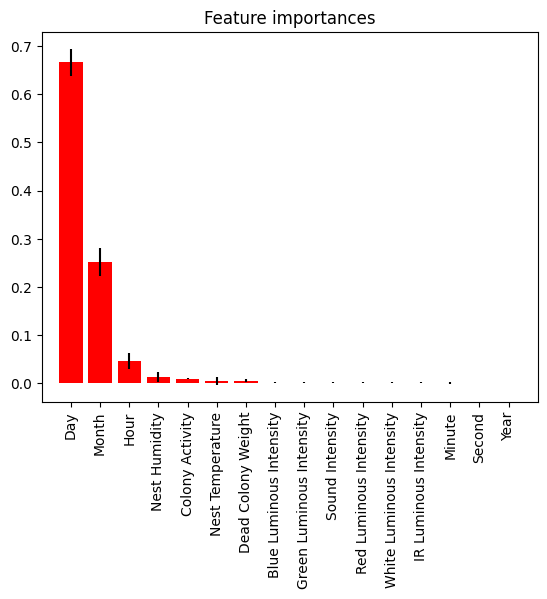

In [16]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Split data into train and test sets
X_RF = data_date_splitted.drop(['Nest Weight','Date'], axis=1)
y_RF = data_date_splitted['Nest Weight']
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_RF, y_RF)

# Get feature importances
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_RF.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_RF.shape[1]), X_RF.columns[indices], rotation=90)
plt.xlim([-1, X_train_RF.shape[1]])
plt.show()

In [17]:
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importances in descending order
print("Feature importances:")
for i in indices:
    print(f'{X_RF.columns[i]}: {importances[i]}')

Feature importances:
Day: 0.6670287230353003
Month: 0.2508863432587433
Hour: 0.045559820284705926
Nest Humidity: 0.011903101414565609
Colony Activity: 0.009240207623840662
Nest Temperature: 0.005013328217895057
Dead Colony Weight: 0.004682916642580261
Blue Luminous Intensity: 0.001053324933517091
Green Luminous Intensity: 0.0010439615915109025
Sound Intensity: 0.0009067463364500004
Red Luminous Intensity: 0.0008212839429332129
White Luminous Intensity: 0.0008024578812412495
IR Luminous Intensity: 0.0006325476028007109
Minute: 0.00042523723391573213
Second: 0.0
Year: 0.0


> Here also we get the same kind of result as Lasso Regression. From the above statistics, we can conclude that the most important features are Day, Month, Hour, Nest Temperature, Sound Intensity, Colony Activity and Dead Colony Weight on the contrary all the light intensities have the same importance and their importance is very low. As different luminous intensities have a high correlation with each other as well as lower importance we have only considered one particular feature maybe the White Luminous Intensity and can drop other Luminous Intensity features to avoid multicollinearity issues.

**Time Series Analysis**

---



> Now in this section we will try to perform Several Time Series Analysis on each and every variable to find different pattern or trend in the features which might be useful in building the model. We have already performed most of the necessary EDA using Power BI. Alongside we will just perform a few more here with python to understand more about the dataset.




In [18]:
#plotting different features over time to see their trend

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Get the data values as a numpy array
values = data_new.values

# Define the groups to plot
groups = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Define a color palette
colors = ['red', 'orange', 'violet', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black', 'cyan']

# Create the subplots
fig = make_subplots(rows=len(groups), cols=1, shared_xaxes=True)

# Add traces and set titles for each subplot
for i, group in enumerate(groups):
    fig.add_trace(go.Scatter(x=data_new.index, y=data_new.iloc[:, group], name=data_new.columns[group], line=dict(color=colors[i%11]), showlegend=False), row=i+1, col=1)
    fig.update_layout(title=f"Group {group}")

# Update layout for better spacing
fig.update_layout(height=800, width=1000, title_text="Different Feature Behaviour Over Time")

# Display the plot
fig.show()

In [19]:
import plotly.graph_objs as go
data_new['Date'] = pd.to_datetime(data_new['Date'], format='%m/%d/%Y %H:%M')

# Filter the dataframe to include only data for day 9 of month 3
day_9_df = data_new.loc[(data_new['Date'].dt.day == 9) & (data_new['Date'].dt.month == 3), :]

# Extract the hour of the day from the 'Date' column
day_9_df['Hour'] = day_9_df['Date'].dt.hour

# Create separate line charts for each feature with day 9 of month 3 data and 24 hours time on x-axis
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Colony Activity'], mode='lines', name='Colony Activity'))
fig1.update_layout(title='Colony Activity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Colony Activity', width=1000, height=300)
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Dead Colony Weight'], mode='lines', name='Dead Colony Weight'))
fig2.update_layout(title='Dead Colony Weight on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Dead Colony Weight', width=1000, height=300)
fig2.show()

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Nest Temperature'], mode='lines', name='Nest Temperature'))
fig3.update_layout(title='Nest Temperature on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Nest Temperature', width=1000, height=300)
fig3.show()

fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Nest Humidity'], mode='lines', name='Nest Humidity'))
fig4.update_layout(title='Nest Humidity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Nest Humidity', width=1000, height=300)
fig4.show()

fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Red Luminous Intensity'], mode='lines', name='Red Luminous Intensity'))
fig5.update_layout(title='Red Luminous Intensity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Red Luminous Intensity', width=1000, height=300)
fig5.show()

fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Green Luminous Intensity'], mode='lines', name='Green Luminous Intensity'))
fig6.update_layout(title='Green Luminous Intensity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Green Luminous Intensity', width=1000, height=300)
fig6.show()

fig7 = go.Figure()
fig7.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Blue Luminous Intensity'], mode='lines', name='Blue Luminous Intensity'))
fig7.update_layout(title='Blue Luminous Intensity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Blue Luminous Intensity', width=1000, height=300)
fig7.show()

fig8 = go.Figure()
fig8.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['White Luminous Intensity'], mode='lines', name='White Luminous Intensity'))
fig8.update_layout(title='White Luminous Intensity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='White Luminous Intensity', width=1000, height=300)
fig8.show()

fig9 = go.Figure()
fig9.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['IR Luminous Intensity'], mode='lines', name='IR Luminous Intensity'))
fig9.update_layout(title='IR Luminous Intensity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='IR Luminous Intensity', width=1000, height=300)
fig9.show()

fig10 = go.Figure()
fig10.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Sound Intensity'], mode='lines', name='Sound Intensity'))
fig10.update_layout(title='Sound Intensity on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Sound Intensity', width=1000, height=300)
fig10.show()

fig11 = go.Figure()
fig11.add_trace(go.Scatter(x=day_9_df['Hour'], y=day_9_df['Nest Weight'], mode='lines', name='Nest Weight'))
fig11.update_layout(title='Nest Weight on Day 9 with 24 Hours Time', xaxis_title='Hour', yaxis_title='Nest Weight', width=1000, height=300)
fig11.show()

/tmp/ipykernel_18/1292156993.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_18/1292156993.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Outcome of the Plots:**
Above we have performed two different visualization. One is one the entire time period available on the dataset and another one is one a particular day of a particular month. We have consider 9th of March. We can get the following insight out of those plot:


1.  All Luminous Features have Similar Characteristics. These increase during the mid-day time whereas at night-time as well as at the early morning hour these are decreased.
2.  Temperature and Humidity are having opposite trends.
3. Temperature, Light Luminous, and Sound Intensities are having similar trends on the contrary Humidity is having the opposite trend.
4. With the increase in temperature and other luminous features the colony activity also increases whereas the nest weight decreases.
5. So in general during the night-time and early morning hour the nest weight is high whereas during mid-day the colony activity is more, but the nest weight is less.




#Checking trend and seasonality in Nest Weight:
After checking the previous visualization it's clear that there is a trend in the Nest weight as well as seasonality.

> **Trend:** The nest weight is having a downward trend. It means with the increase in temperature it decreases. In March the temperature is colder than that in April. That's why we can see there is a lower trend in April.

> **Seasonality:** The nest weight changes daily. We can divide the 24 hours of daytime into 3 sections. These are mid-day, night-time, and early morning. During mid-day, the nest weight tends to decrease whereas in the night-time and early morning it's tending to increase.

In [20]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset into a DataFrame
df = pd.read_csv('/kaggle/input/hourly-sampled-data/sampled_data.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to a higher frequency, e.g., hourly ('H')
df_resampled = df['Nest Weight'].resample('H').mean()

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Perform seasonal decomposition
result = seasonal_decompose(df_resampled)

# Create subplots
fig = make_subplots(rows=4, cols=1)

# Add trace for original signal
fig.add_trace(go.Scatter(x=df_resampled.index, y=df_resampled.values, name='Original Signal'), row=1, col=1)

# Add trace for trend component
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend.values, name='Trend'), row=2, col=1)

# Add trace for seasonal component
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal.values, name='Seasonal'), row=3, col=1)

# Add trace for residual component
fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid.values, name='Residual'), row=4, col=1)

# Update layout to display x-axis labels only on bottom subplot
fig.update_layout(xaxis=dict(showticklabels=False), xaxis4=dict(showticklabels=True))

# Display the plot
fig.show()

#Nest Weight Forecasting using LTSM

In [21]:
# Load the dataset
data_date_splitted

,Date,Colony Activity,Dead Colony Weight,Nest Temperature,Nest Humidity,Red Luminous Intensity,Green Luminous Intensity,Blue Luminous Intensity,White Luminous Intensity,IR Luminous Intensity,Sound Intensity,Nest Weight,Year,Month,Day,Hour,Minute,Second
0,2023-03-03 15:36:00,3,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,2023,3,3,15,36,0
1,2023-03-03 15:51:00,14,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,2023,3,3,15,51,0
2,2023-03-03 16:07:00,10,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,2023,3,3,16,7,0
3,2023-03-03 18:07:00,0,0.001324,17.0530,67.6702,0,0,0,0,0,265,35.2686,2023,3,3,18,7,0
4,2023-03-03 18:22:00,0,0.001135,17.0530,67.6702,0,0,0,0,0,265,35.2686,2023,3,3,18,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,2023-04-08 23:58:00,0,0.025719,22.1590,0.0000,0,0,0,0,0,288,31.8800,2023,4,8,23,58,0
1413,2023-04-09 00:13:00,0,0.025719,22.1590,0.0000,0,0,0,0,0,288,31.8800,2023,4,9,0,13,0
1414,2023-04-09 01:43:00,0,0.034039,22.0079,0.0000,0,0,0,0,0,227,31.8114,2023,4,9,1,43,0
1415,2023-04-09 01:58:00,0,0.034039,22.0079,0.0000,0,0,0,0,0,227,31.8114,2023,4,9,1,58,0


#Plan of attack for Multivariate LSTM model:
1. Selecting the Important Features: As we have seen the Luminous Features are highly correlated so to avoid multicolinearity issues we have only considered White Luminous Intensity. We also found that Nest weight is also dependent on Hour, Day and Month that is why we have also considered these features which are extracted from the Original Date.

2. Scaling the Features: As there is a high variance in features we have decided to use min-max scaling to normalize the features and to reduce the variance in different features.

3. Splitting Data: We have decided to split the dataset into an 80:20 ratio. Where 80% is to train the model and the rest 20% is to test the model.

4. Preparing the Train Data: We are going to consider 10 features to train the model. We are looking back 10 steps to predict the 11th time step. That's why we have decided n_previous_step=10. We have scaled the X_train but do not scale the Y_train as we want to predict the same scale as the original Nest Weight.

5. Building the Model: Next we have developed a single-layer LSTM model as we have only a small amount of data. If we use a more complex structure it might result in overfitting.

6. Train and test the model: We have trained the model and tested the model as well as visually compared the predicted result with the test result.

7. Preparing Data for future forecast and forecasting: As the LSTM model is trained on 10 features it does expect a tensor dimension of (m,n,p) where m=data points, n=past_steps and p=number of the feature. For this, we need to give all the features to make future predictions. But for future days we can only the Date Feature. For this reason, we first used univariate time series forecasting (SARIMAX, AUTOARIMA) to forecast every feature and feed these features back to the LSTM to make future predictions considering the 10 features.

Here is the notebook link of univariate time series model:[**Univariate Time Series Forecasting**](https://colab.research.google.com/drive/1AJVTAgfsGXS2z6GE6y3qWAGNkbbYlbhx#scrollTo=k5BP6basKtRM)

#Selecting the important features

In [22]:
#Importing Libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# Select relevant features
features = ['Colony Activity', 'Dead Colony Weight', 'Nest Temperature', 'Nest Humidity',
            'White Luminous Intensity', 'Sound Intensity', 'Nest Weight', 'Month', 'Day', 'Hour']

data = data_date_splitted[features]
data



2024-03-08 15:50:29.354218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 15:50:29.354349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 15:50:29.482338: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


,Colony Activity,Dead Colony Weight,Nest Temperature,Nest Humidity,White Luminous Intensity,Sound Intensity,Nest Weight,Month,Day,Hour
0,3,0.003782,17.1135,67.0595,1464,472,35.2685,3,3,15
1,14,0.003782,17.1135,67.0595,1464,472,35.2685,3,3,15
2,10,0.003782,17.1135,67.0595,1464,472,35.2685,3,3,16
3,0,0.001324,17.0530,67.6702,0,265,35.2686,3,3,18
4,0,0.001135,17.0530,67.6702,0,265,35.2686,3,3,18
...,...,...,...,...,...,...,...,...,...,...
1412,0,0.025719,22.1590,0.0000,0,288,31.8800,4,8,23
1413,0,0.025719,22.1590,0.0000,0,288,31.8800,4,9,0
1414,0,0.034039,22.0079,0.0000,0,227,31.8114,4,9,1
1415,0,0.034039,22.0079,0.0000,0,227,31.8114,4,9,1


#Normalizing the features

In [23]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

#Splitting the dataset

In [24]:
# Split the dataset into training and testing data (80:20)
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

#Preparing the training data

In [25]:
n_steps = 10 #steps to look back

# Prepare the training data
X_train, y_train = [], []
for i in range(n_steps, len(train_data)):
    X_train.append(train_data[i - n_steps:i])
    y_train.append(data.iloc[i][6])

X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the testing data
X_test, y_test = [], []
for i in range(n_steps, len(test_data)):
    X_test.append(test_data[i - n_steps:i])
    y_test.append(data.iloc[i+train_size][6])

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_train.shape)
print(y_train.shape)


(1090, 10, 10)
(1090,)


#Performing Grid Seach to find optimal Hyperparameter

In [26]:
'''
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)
'''
'''
from keras.layers import Bidirectional, LSTM, Dense
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the LSTM model
def create_model(regularization=0.01):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu', kernel_regularizer=l2(regularization), recurrent_regularizer=l2(regularization), input_shape=(n_steps, len(features)))))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Create a KerasRegressor object for use with scikit-learn
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
param_grid = {'regularization': [0.01, 0.001, 0.0001], 'epochs': [50, 100, 150], 'batch_size': [32, 64, 128]}

# Perform grid search using cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding MSE
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))'''
#Best: -0.415044 using {'batch_size': 32, 'epochs': 100, 'regularization': 0.001}

"\nfrom keras.layers import Bidirectional, LSTM, Dense\nfrom keras.regularizers import l2\nfrom keras.wrappers.scikit_learn import KerasRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the LSTM model\ndef create_model(regularization=0.01):\n    model = Sequential()\n    model.add(Bidirectional(LSTM(50, activation='relu', kernel_regularizer=l2(regularization), recurrent_regularizer=l2(regularization), input_shape=(n_steps, len(features)))))\n    model.add(Dense(1))\n    model.compile(optimizer='adam', loss='mse')\n    return model\n\n# Create a KerasRegressor object for use with scikit-learn\nmodel = KerasRegressor(build_fn=create_model, verbose=0)\n\n# Define the hyperparameters to search over\nparam_grid = {'regularization': [0.01, 0.001, 0.0001], 'epochs': [50, 100, 150], 'batch_size': [32, 64, 128]}\n\n# Perform grid search using cross-validation\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)\ngrid_result = grid.fit(X_train, y_train)\n\n# P

#Model Building
We have built a simple one layer unidirectional LSTM with 50 neurons in first layer. We have used activation function as Relu and Optimizer as adam. MSE is used as loss parameter.

In [27]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=16)

Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 976.0248
Epoch 2/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 63.5739
Epoch 3/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1621
Epoch 4/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8100
Epoch 5/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3802
Epoch 6/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2967
Epoch 7/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2151
Epoch 8/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1244
Epoch 9/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1532
Epoch 10/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1423
Epoch 11/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1151
Epoch 12/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0699
Epoch 13/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0587
Epoch 14/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2222
Epoch 15/40
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0615
Epoch 16/40
69/69 ━━━━━━━━━

In [28]:
# Make predictions on test data
predictions = model.predict(X_test)

print("Predicted Values:")
print(predictions)
print("Actual Values:")
print(y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Values:
[[35.50595 ]
 [35.548   ]
 [35.584103]
 [35.583797]
 [35.568913]
 [35.64486 ]
 [35.7599  ]
 [35.908802]
 [35.983467]
 [35.953705]
 [35.925846]
 [35.979908]
 [36.030033]
 [36.074024]
 [36.05411 ]
 [36.023327]
 [35.950283]
 [35.916973]
 [35.91795 ]
 [35.91001 ]
 [35.902523]
 [35.89077 ]
 [35.813805]
 [35.778946]
 [35.643894]
 [35.60931 ]
 [35.689648]
 [35.789127]
 [35.874832]
 [35.903362]
 [35.866306]
 [35.770092]
 [35.744278]
 [35.73838 ]
 [35.731907]
 [35.741104]
 [35.749466]
 [35.758373]
 [35.754898]
 [35.73262 ]
 [35.699333]
 [35.670776]
 [35.639816]
 [35.60015 ]
 [35.609585]
 [35.626663]
 [35.662663]
 [35.675613]
 [35.666206]
 [35.630413]
 [35.592564]
 [35.572285]
 [35.55298 ]
 [35.534096]
 [35.516014]
 [35.513374]
 [35.52529 ]
 [35.526783]
 [35.525833]
 [35.528996]
 [35.542202]
 [35.52659 ]
 [35.542305]
 [35.408443]
 [35.36335 ]
 [35.41199 ]
 [35.49712 ]
 [35.56529 ]
 [35.61175 ]
 [35.610023]
 [35.524998]
 [35.501453]
 [35.485

#Testing the model

In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)

MSE: 0.9641047266969973


In [30]:
# Convert predictions and y_test to DataFrames with proper index
predictions_df = pd.DataFrame(predictions, index=data_new['Date'][-len(predictions):])
y_test_df = pd.DataFrame(y_test, index=data_new['Date'][-len(y_test):])

# Combine predicted and actual values into a single DataFrame
combined_df = pd.concat([predictions_df, y_test_df], axis=1)
combined_df.columns = ['Predicted', 'Actual']

# Create a scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['Predicted'], name='Predicted'))
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['Actual'], name='Actual'))

# Customize the layout
fig.update_layout(
    title='Predicted vs Actual Nest Weight',
    xaxis_title='Date',
    yaxis_title='Nest Weight'
)

# Show the plot
fig.show()


> The mse for the model is 0.678 which is quite reasonabel. We can also visualize the actual and predicted value where it's clear that the model could capture both the trend and seasonality of the original nest weight.

#Making Future Forecasting

> Here as we have considered n_previous_steps=10 that's why we have merged few values from the original dataset to make prediction on the unknwon days.

In [31]:
#Loading the submission data
data_forecast=pd.read_csv("/kaggle/input/submission-data-lstm/submission_data(Modified).csv")

#Creating Month, Day and Hour Feature

In [32]:
# Convert the 'Date' column to datetime
data_forecast['Date'] = pd.to_datetime(data_date_splitted['Date'], format='%Y-%m-%d %H:%M:%S')
# Extract year, month, day, hour, minute, and second
data_forecast['Month'] = data_date_splitted['Date'].dt.month
data_forecast['Day'] = data_date_splitted['Date'].dt.day
data_forecast['Hour'] = data_date_splitted['Date'].dt.hour


In [33]:
data_forecast.set_index('Date', inplace=True) #Setting Date as index

#Scaling the Dataset

In [34]:
data_forcast_scaled=scaler.transform(data_forecast)

#Preparing the data for Forecasting

In [35]:
# Prepare the Forecasting data
n_steps=10
X_forecast, y_forecast = [], []
for i in range(n_steps, len(data_forecast)):
    X_forecast.append(data_forcast_scaled[i - n_steps:i])
    y_forecast.append(data_forecast.iloc[i][6])

X_forecast, y_forecast = np.array(X_forecast), np.array(y_forecast)
print(X_forecast.shape)
print(y_forecast.shape)

(516, 10, 10)
(516,)


#Forecasting

In [36]:
forecast_values=model.predict(X_forecast)
output=forecast_values[-158:]
output


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[20.58033 ],
       [21.562275],
       [22.031332],
       [22.6851  ],
       [23.585707],
       [24.18086 ],
       [24.665724],
       [25.031944],
       [25.623114],
       [26.341719],
       [26.895182],
       [27.19028 ],
       [27.369335],
       [27.409546],
       [27.329287],
       [26.631935],
       [25.441519],
       [26.023605],
       [26.501842],
       [26.938559],
       [27.332296],
       [27.783869],
       [28.172533],
       [28.543522],
       [28.905844],
       [29.159712],
       [29.39168 ],
       [29.650648],
       [29.873228],
       [30.104815],
       [30.310545],
       [30.453724],
       [30.608225],
       [30.767689],
       [30.864008],
       [30.965782],
       [31.093306],
       [31.16976 ],
       [31.274551],
       [31.401268],
       [31.47153 ],
       [31.53761 ],
       [31.592594],
       [31.659975],
       [31.730444],
       [31.841822],
       [31.71898 ],
       [31.820465],
       [31.91474 ],
       [32.016468],


#Preparing the submission file

In [37]:
'''
data_submisson=pd.read_csv("/content/submission_data.csv")
data_submisson.set_index("Date", inplace=True)
output=pd.DataFrame(output, columns=["Nest Weight"])
output.index=data_submisson.index
output.to_csv("submission_LSTM.csv")
'''

'\ndata_submisson=pd.read_csv("/content/submission_data.csv")\ndata_submisson.set_index("Date", inplace=True)\noutput=pd.DataFrame(output, columns=["Nest Weight"])\noutput.index=data_submisson.index\noutput.to_csv("submission_LSTM.csv")\n'

In [38]:
mse_forecast = mean_squared_error(y_forecast[-158:], forecast_values[-158:])
print('MSE:', mse_forecast)

MSE: 6.814661667710002


#Nest Weight forecasting using VARMAX (Vector Autoregressive Moving-Average model with eXogenous variables)
> A vector autoregressor (VAR) is a type of statistical model used for analyzing and forecasting multivariate time series data. In a VAR model, each variable in the time series is modeled as a linear function of its own lagged values as well as the lagged values of the other variables in the system.

> In other words, a VAR model is a system of equations where each equation represents a variable in the time series. The coefficients of the equations represent the relationships between the variables, and the lagged values of the variables are used to capture the dynamic dependencies between them.

> VARMAX (Vector Autoregressive Moving-Average model with eXogenous variables) is an extension of the VAR (Vector Autoregression) model that allows for the inclusion of exogenous variables in the model. Like the VAR model, VARMAX is a multivariate time series model that can be used for forecasting and analyzing the relationship between multiple time series variables.

> In a VARMAX model, the dependent variables are modeled as a function of their own lagged values, the lagged values of the other variables in the system, and the lagged values of any exogenous variables. The inclusion of exogenous variables allows the model to capture the effect of external factors on the dependent variables.

> In our case we have to predict the nest weight at the same time we have to consider the other features too. Upon the pervious time series analysis we figured out that other features like temperature, humidity, light and sound intensity have some impact on the nest weight. Not only that but also some exogenous variables such as month, hour, day also might have impact on the nest weight. For this reason we are using VARMAX model which can forecast everything in a good way.

In [39]:
data_var=data_new.copy()
data_var['Date'] = pd.to_datetime(data_var['Date'], format='%Y-%m-%d %H:%M:%S')
data_var.set_index('Date', inplace=True)
data_var=data_var.drop(["Red Luminous Intensity","Green Luminous Intensity","Blue Luminous Intensity","IR Luminous Intensity"],axis=1)
data_var.head()

,Colony Activity,Dead Colony Weight,Nest Temperature,Nest Humidity,White Luminous Intensity,Sound Intensity,Nest Weight
Date,,,,,,,
2023-03-03 15:36:00,3,0.003782,17.1135,67.0595,1464,472,35.2685
2023-03-03 15:51:00,14,0.003782,17.1135,67.0595,1464,472,35.2685
2023-03-03 16:07:00,10,0.003782,17.1135,67.0595,1464,472,35.2685
2023-03-03 18:07:00,0,0.001324,17.0530,67.6702,0,265,35.2686
2023-03-03 18:22:00,0,0.001135,17.0530,67.6702,0,265,35.2686


# The ADF (Augmented Dickey-Fuller) test:
> Initilly we need to understand what stationary and non-stationary means. In general if data changes over time meaning there is a dependecy of data over time it is called non-stationary data on the contrary stationary data means that does not change over time.

> The ADF (Augmented Dickey-Fuller) test is a statistical test used to determine whether a time series is stationary or not. The ADF test uses a null hypothesis that the time series is non-stationary. The alternative hypothesis is that the time series is stationary.

> **From the analysis we figured out that the nest weight is non-stationary that menas it changes over time.**


In [40]:
from statsmodels.tsa.stattools import adfuller

# Loop through each column in the DataFrame
for col in data_new.columns:
    # Perform the ADF test on the column
    result = adfuller(data_new[col])

    # Extract the p-value from the test result
    p_value = result[1]

    # Check if the p-value is less than the significance level (e.g. 0.05)
    if p_value < 0.05:
        print(col, "is stationary (p-value: %f)" % p_value)
    else:
        print(col, "is non-stationary (p-value: %f)" % p_value)

Date is non-stationary (p-value: 1.000000)
Colony Activity is stationary (p-value: 0.000000)
Dead Colony Weight is stationary (p-value: 0.000000)
Nest Temperature is stationary (p-value: 0.000000)
Nest Humidity is stationary (p-value: 0.000005)
Red Luminous Intensity is stationary (p-value: 0.000000)
Green Luminous Intensity is stationary (p-value: 0.000000)
Blue Luminous Intensity is stationary (p-value: 0.000000)
White Luminous Intensity is stationary (p-value: 0.000000)
IR Luminous Intensity is stationary (p-value: 0.000000)
Sound Intensity is stationary (p-value: 0.000000)
Nest Weight is non-stationary (p-value: 0.540858)


#Granger causality tests
Using grangercausalitytests function we can check is nest weight does have any casuality with other available features.

From this test it is clearly visible that other features do have casual effect on Nest Weight.

In [41]:
from statsmodels.tsa.stattools import grangercausalitytests

# Select all available features except for nest_weight
features = [col for col in data_var.columns if col != 'Nest Weight']

# Loop through each feature and run the Granger causality test
for feat in features:
    results = grangercausalitytests(data_var[['Nest Weight', feat]], maxlag=3, verbose=False)
    p_value = results[3][0]['params_ftest'][1]

    if p_value < 0.05:
        print("There is Granger causality between %s and nest_weight (p-value: %f)" % (feat, p_value))
    else:
        print("There is no Granger causality between %s and nest_weight (p-value: %f)" % (feat, p_value))

There is Granger causality between Colony Activity and nest_weight (p-value: 0.000015)
There is Granger causality between Dead Colony Weight and nest_weight (p-value: 0.000159)
There is Granger causality between Nest Temperature and nest_weight (p-value: 0.000006)
There is Granger causality between Nest Humidity and nest_weight (p-value: 0.000321)
There is Granger causality between White Luminous Intensity and nest_weight (p-value: 0.000000)
There is Granger causality between Sound Intensity and nest_weight (p-value: 0.005626)


#Splitting the Dataset into Train and Test Set

In [42]:
data_varmax=data_new.copy()
# Convert the 'Date' column to datetime
data_varmax['Date'] = pd.to_datetime(data_varmax['Date'], format='%Y-%m-%d %H:%M:%S')
# Extract year, month, day, hour, minute, and second
data_varmax['Month'] = data_varmax['Date'].dt.month
data_varmax['Day'] = data_varmax['Date'].dt.day
data_varmax['Hour'] = data_varmax['Date'].dt.hour
data_varmax.set_index("Date",inplace=True)

In [43]:
# Split the dataset into training and testing data
train_size_var = int(len(data_varmax) * 0.8)
train_data_var = data_varmax[:train_size_var]
test_data_var = data_varmax[train_size_var:]
train_data_var

,Colony Activity,Dead Colony Weight,Nest Temperature,Nest Humidity,Red Luminous Intensity,Green Luminous Intensity,Blue Luminous Intensity,White Luminous Intensity,IR Luminous Intensity,Sound Intensity,Nest Weight,Month,Day,Hour
Date,,,,,,,,,,,,,,
2023-03-03 15:36:00,3,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,3,3,15
2023-03-03 15:51:00,14,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,3,3,15
2023-03-03 16:07:00,10,0.003782,17.1135,67.0595,458,709,430,1464,998,472,35.2685,3,3,16
2023-03-03 18:07:00,0,0.001324,17.0530,67.6702,0,0,0,0,0,265,35.2686,3,3,18
2023-03-03 18:22:00,0,0.001135,17.0530,67.6702,0,0,0,0,0,265,35.2686,3,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-02 04:04:00,0,0.022787,18.2112,65.6977,0,0,0,0,0,323,35.0686,4,2,4
2023-04-02 04:19:00,0,0.022787,18.2112,65.6977,0,0,0,0,0,323,35.0686,4,2,4
2023-04-02 04:34:00,14,0.022787,18.2112,65.6977,0,0,0,0,0,323,35.0686,4,2,4


In [44]:
#training a var model
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
model_sample = VAR(data_var.diff()[1:])


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



> Here the data_var.diff() function is used to calculate the first difference of the data_var dataset. It is used to make a non-stationary time series stationary. The [1:] indexing is used to remove the first row of the differenced dataset, which contains NaN values due to the differencing operation. In general VAR model accepts a stationary dataset, that's why we have used diff as the nest weight feature is non-stationary.

In [45]:
#Finding the best lag value to develop the VARMAX model
sorted_order=model_sample.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        26.24      26.27*   2.489e+11       26.25
1        26.29       26.51   2.619e+11       26.37
2        26.30       26.70   2.644e+11       26.45
3        25.91       26.50   1.785e+11       26.13
4        25.81       26.59   1.613e+11       26.10
5        25.76       26.73   1.533e+11       26.12
6        25.58       26.74   1.292e+11      26.02*
7        25.57       26.91   1.267e+11       26.07
8        25.58       27.12   1.287e+11       26.16
9        25.55       27.27   1.250e+11       26.20
10       25.55       27.46   1.247e+11       26.26
11       25.58       27.68   1.288e+11       26.37
12      25.55*       27.84  1.246e+11*       26.40
13       25.56       28.04   1.263e+11       26.49
14       25.58       28.25   1.294e+11       26.58
15       25.62       28.47   1.340e+11       26.69
16       25.64       28.69   1.

 > In general, we have to provide a lag value which is nothing but tells the algorithm to consider n-number of previous time step values to predict the future predictions. We have used the select_order function of the AVR model to find different scores such as AIC for different lag values. From the above table we can choose lag value as 6, or 12.


#Building the VARMAX model with lag=6
Here we have also considered Month, Day and Hour as exogenous variables. There are the variables which does not part of the time series, these are external variables but we believe that these variables do have impact on nest weight.

In [46]:
model_var = VARMAX(train_data_var.drop(["Month","Day","Hour"], axis=1),exog=train_data_var[["Month","Day","Hour"]], order=(6,0), enforce_stationarity= True)
model_var = model_var.fit(disp=False)
print(model_var.summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                                                                                                                             Statespace Model Results                                                                                                                                             
Dep. Variable:     ['Colony Activity', 'Dead Colony Weight', 'Nest Temperature', 'Nest Humidity', 'Red Luminous Intensity', 'Green Luminous Intensity', 'Blue Luminous Intensity', 'White Luminous Intensity', 'IR Luminous Intensity', 'Sound Intensity', 'Nest Weight']   No. Observations:                 1100
Model:                                                                                                                                                                                                                                                            VARX(6)   Log Likelihood              -46115.032
                                                                               

> So we have trained the model with a lag value of 12 and the model was complied 5 times after which the mean values are considered as final output of each and every feature.

#Testing the model:
> We have splitted the dataset into 80:20 ratio. We have trained the model with 80% of the dataset and now we can test the performance of the model on the test set.

In [47]:
# Use the trained VARMAX model to make predictions on the test data
predictions = model_var.get_prediction(start=len(train_data_var), end=len(train_data_var)+len(test_data_var)-1 , exog=test_data_var[["Month","Day","Hour"]])

# Get the predicted values as a pandas DataFrame with the date as the index
predicted_values = predictions.predicted_mean
predicted_values.index = test_data_var.index

# Print the predicted values
print(predicted_values)

                     Colony Activity  Dead Colony Weight  Nest Temperature  \
Date                                                                         
2023-04-02 06:49:00       347.436862            0.029705         21.300995   
2023-04-02 07:04:00       298.225758            0.027022         20.622281   
2023-04-02 07:19:00       249.350821            0.024006         20.028459   
2023-04-02 07:34:00       238.660496            0.023403         18.963001   
2023-04-02 09:04:00       290.911615            0.022146         19.044342   
...                              ...                 ...               ...   
2023-04-08 23:58:00       350.422652            0.005707         26.741866   
2023-04-09 00:13:00       245.117952            0.011257         24.562588   
2023-04-09 01:43:00       152.953131            0.015530         23.179318   
2023-04-09 01:58:00        92.966261            0.018662         22.321066   
2023-04-09 02:13:00        70.837994            0.020575        

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [48]:
#creating a plot to compare actual values of nest weight with the predicted values
# Create a trace for the predicted values
trace_pred = go.Scatter(x=predicted_values.index, y=predicted_values['Nest Weight'], name='Predicted Values')

# Create a trace for the actual values
trace_actual = go.Scatter(x=test_data_var.index, y=test_data_var['Nest Weight'], name='Actual Values')

# Create a layout for the plot
layout = go.Layout(title='VARMAX Model Predictions Vs Actual Values of Nest Weight', xaxis_title='Date', yaxis_title='Nest Weight')

# Create a figure with the predicted and actual values traces
fig = go.Figure(data=[trace_pred, trace_actual], layout=layout)

# Show the figure
fig.show()

In [49]:
# Calculate the MSE for each variable in the model
mse = mean_squared_error(predicted_values["Nest Weight"], test_data_var["Nest Weight"] )

# Print the MSE for each variable in the model
print("Mean Squared Error (MSE):")
print(mse)

Mean Squared Error (MSE):
6.7336815428479335


> The MSE of the model is 7.058 on the test set. We can also visualize the plot where we can see the model could find the lower trend but it could not capture the seasonality that is during each day the nest weight increases at the night and early morning time and decreases at the mid-day time.

#Making Future Forecast:
> We have to forecast for next 158 time steps for which we are provided with the submission data file. In train set we have 1100 data point and in test set we have 275 data points. So there are total 1375 data point in the original data set(after removing the duplicates) for which we have the values. Now we want to forecast for future 158 time steps. We have used forecast where we set the steps=len(new)+len(test_data_var) which means we have train the model till 1100th point and we have to forecast for the dates containing in both test_set and sample data.

In [50]:
# Create a new DataFrame with the specified dates as the index
new = pd.read_csv("/kaggle/input/submission-data/submission_data.csv")
new.set_index('Date', inplace=True)


# Concatenate the datasets vertically
date=test_data_var.index
date2=new.index
# Converting date and date2 to Series
date_series = pd.Series(date)
date2_series = pd.Series(date2)

# Concatenating the date_series and date2_series
concatenated_dates = pd.concat([date_series, date2_series])

# Create a new DataFrame with the dates only
date_data = pd.DataFrame({'Date': concatenated_dates})
date_data['Date'] = pd.to_datetime(date_data['Date'], format='%Y-%m-%d %H:%M:%S')

date_data['Month'] = date_data['Date'].dt.month
date_data['Day'] = date_data['Date'].dt.day
date_data['Hour'] = date_data['Date'].dt.hour

In [51]:
# Use the fitted VARMAX model to make predictions for the specified dates
pred = model_var.forecast(steps=len(new)+len(test_data_var), exog=date_data[["Month","Day","Hour"]])

submission_forecast=pred[-158:] #slicing the desired values
submission_forecast.index=new.index #setting the index
output_VARMAX=submission_forecast["Nest Weight"]
#output_VARMAX.to_csv("Submission_VARMAX.csv")



/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



#Conclusion:
The univariate SARIMAX model is giving comparatively better performance. When we are using multivariate time series forecasting like LSTM or VARMAX we are getting results which are having more variance and higher range compare to the actual values.

#References:
1. https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.varmax.VARMAXResults.get_forecast.html#statsmodels.tsa.statespace.varmax.VARMAXResults.get_forecast

2. https://www.kaggle.com/code/sajikim
time-series-forecasting-methods-example-python

3. https://www.section.io/engineering-education/multivariate-time-series-using-auto-arima/#:~:text=In%20this%20tutorial%2C%20We%20have,%2C%20d%20%2C%20and%20q%20values

4. https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

5. https://www.kaggle.com/code/dimitreoliveira/deep-learning-for-time-series-forecasting

6. https://www.kaggle.com/code/sasakitetsuya/multivariate-time-series-forecasting-with-lstms

7. https://github.com/bnsreenu/python_for_microscopists/blob/master/181_multivariate_timeseries_LSTM_GE.py

